In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.read_csv(r"C:\Users\Administrator\Downloads\ab_test_data_5000.csv")

In [10]:
print(df.isnull().sum())
print(df.dtypes)
df['timestamp'] = pd.to_datetime(df['timestamp'])

user_id         0
group           0
landing_page    0
country         0
converted       0
timestamp       0
dtype: int64
user_id          int64
group           object
landing_page    object
country         object
converted        int64
timestamp       object
dtype: object


       group  converted
0    control   0.109026
1  treatment   0.139423


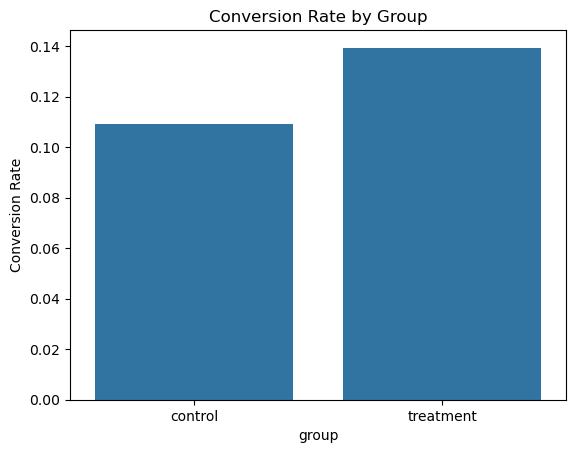

In [11]:
conversion_rate = df.groupby('group')['converted'].mean().reset_index()
print(conversion_rate)
sns.barplot(x='group', y='converted', data=conversion_rate)
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.show()

In [12]:
df_encoded = pd.get_dummies(df[['group', 'converted']], drop_first=True)
df_encoded.rename(columns={'group_treatment': 'treatment_group'}, inplace=True)
model = smf.logit('converted ~ treatment_group', data=df_encoded).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.374146
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Jul 2025   Pseudo R-squ.:                0.002836
Time:                        10:42:43   Log-Likelihood:                -1870.7
converged:                       True   LL-Null:                       -1876.1
Covariance Type:            nonrobust   LLR p-value:                  0.001106
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.1007      0.064    -32.763      0.000      -2.226   

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
df = pd.read_csv(r"C:\Users\Administrator\Downloads\ab_test_data_5000.csv")

group_summary = df.groupby('group')['converted'].agg(['sum', 'count'])
group_summary['conversion_rate'] = group_summary['sum'] / group_summary['count']
print(" Conversion Summary:\n")
print(group_summary)

contingency = pd.crosstab(df['group'], df['converted'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("\n Chi-Square Test Results:")
print(f"Chi2 statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")

if p < 0.05:
    print("\n The difference in conversion rates is statistically significant")
else:
    print("\n The difference in conversion rates is NOT statistically significant")


 Conversion Summary:

           sum  count  conversion_rate
group                                 
control    273   2504         0.109026
treatment  348   2496         0.139423

 Chi-Square Test Results:
Chi2 statistic: 10.3408
p-value: 0.0013

 The difference in conversion rates is statistically significant
